In [94]:
%pylab inline
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

Populating the interactive namespace from numpy and matplotlib


In [105]:
server_data = pd.read_csv('data2.gz', sep=';', header = None)
server_data.columns = ['date', 'month', 'day', 'dayofweek', 'hour', 'method', 'content', 'protocol', 'domain', 'code', 'size', 'target']
server_data['protocol'] = pd.Categorical.from_array(server_data['protocol']).codes
server_data['method'] = pd.Categorical.from_array(server_data['protocol']).codes

In [100]:
server_data.head(10)

,date,month,day,dayofweek,hour,method,content,protocol,domain,code,size,target
0,815854245,11,8,3,69045.0,GET,/~macphed/finite/fe_resources/node16.html,-1,mffry.mines.edu,200,1413,2
1,815743836,11,7,2,45036.0,GET,/dcs/courses/cai/html/introduction_lesson/desc...,6,enghouse.com,200,1520,2
2,812296001,9,28,4,53201.0,GET,/mlookup/white.html,6,mac13.ee.umn.edu,200,511,2
3,812531958,10,1,0,29958.0,GET,/~scottp/publish.html,-1,ix-bos6-07.ix.netcom.com,200,271,2
4,817730723,11,30,4,44723.0,GET,/~scottp/index.html,-1,www.gnofn.org,200,1990,2
5,820322820,12,30,6,44820.0,GET,/~macpherc/images/tspbadge.gif,-1,dd59-006.compuserve.com,200,3282,2
6,812575818,10,1,0,73818.0,GET,/search/index.html,6,alf.usask.ca,200,1673,2
7,813597593,10,13,5,58793.0,GET,/wcvm/picture.gif,6,wcvm7661.usask.ca,200,1295,2
8,818321925,12,7,4,31125.0,GET,/~ladd/lsu.html,-1,prism.lib.auburn.edu,200,1093,2
9,816535726,11,16,4,59326.0,GET,/~zhaok/image/icon/uslogo32.gif,-1,geolab10.usask.ca,200,1640,2


In [5]:
def print_hist(x, b= 10, lim = None, label = "default"):
    hist, bins = np.histogram(x, bins=b)
    center = (bins[:-1] + bins[1:]) / 2
    w = 1.*(amax(x) - amin(x))/b
    
    if lim != None:
        xlim(lim)
    plt.bar(center, hist, align='center', width=w)
    plt.title(label)
    plt.show()

def fill_with_mean(data, target, feat, n_sign = '-'):
    targets = unique(data[target])
    means = [mean(data[data[target] == t][data[feat] != n_sign][feat].astype(int)) for t in targets]
    print means
    for t, m in zip(targets, means):
        print t, m
        data.loc[data[target] == t, feat] = data[data[target] == t][feat].map(lambda x: m if x == n_sign else x) 



In [106]:
fill_with_mean(server_data, 'target', 'size')
server_data['size'] = server_data['size'].astype('float64')

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[19068.667106804973, 5573.551018238432, 11853.203347331131]
1 19068.6671068
2 5573.55101824
3 11853.2033473


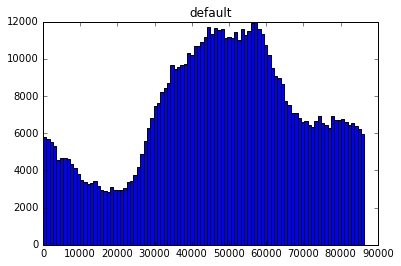

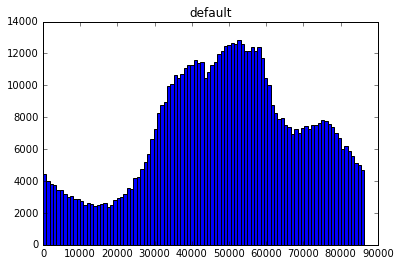

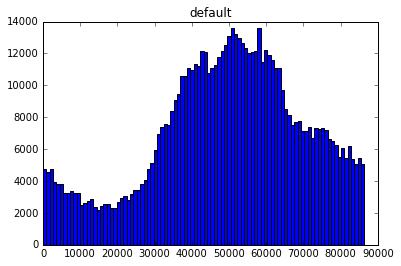

In [43]:
print_hist(server_data[server_data['target'] == 1]['hour'], b=96)
print_hist(server_data[server_data['target'] == 2]['hour'], b=96)
print_hist(server_data[server_data['target'] == 3]['hour'], b=96)

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


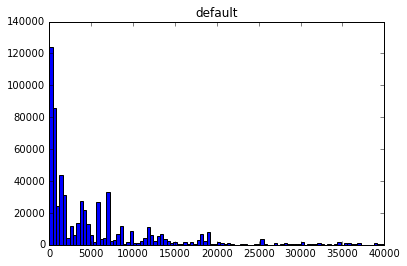

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


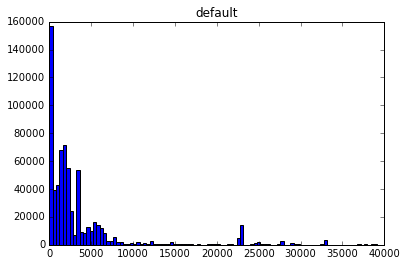

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


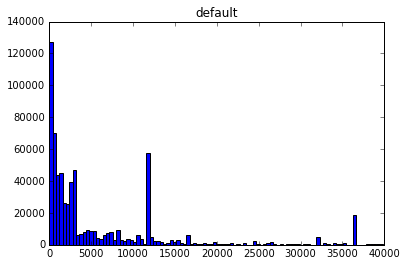

In [61]:
print_hist(server_data[server_data['target'] == 1][server_data['size'] < 40000]['size'], b=100)
print_hist(server_data[server_data['target'] == 2][server_data['size'] < 40000]['size'], b=100)
print_hist(server_data[server_data['target'] == 3][server_data['size'] < 40000]['size'], b=100)



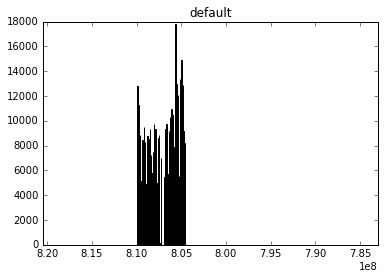

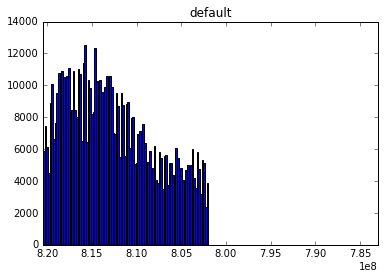

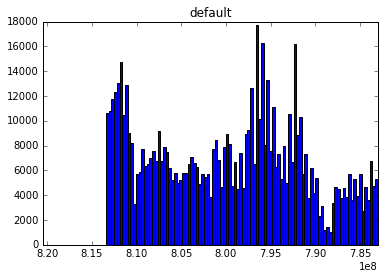

In [44]:
limes = (server_data['date'].max(), server_data['date'].min())
print_hist(server_data[server_data['target'] == 1]['date'], lim=limes, b=100)
print_hist(server_data[server_data['target'] == 2]['date'], lim=limes, b=100)
print_hist(server_data[server_data['target'] == 3]['date'], lim=limes, b=100)

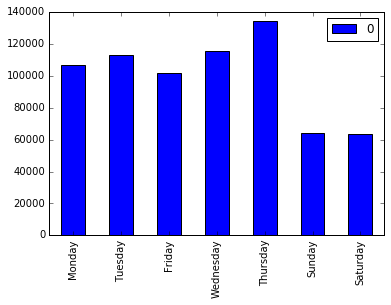

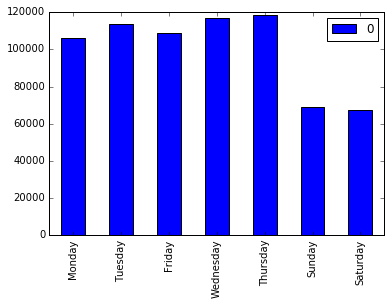

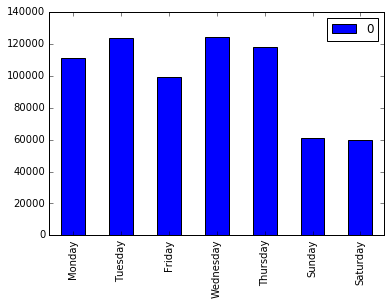

In [45]:
from collections import Counter
from datetime import datetime

def datebar(date, fmt):
    c = Counter(map(lambda d: datetime.fromtimestamp(d).strftime(fmt), date))

    d = pd.DataFrame.from_dict(c, orient='index')
    d.plot(kind='bar')
    
datebar(server_data[server_data['target'] == 1]['date'], "%A")
datebar(server_data[server_data['target'] == 2]['date'], "%A")
datebar(server_data[server_data['target'] == 3]['date'], "%A")

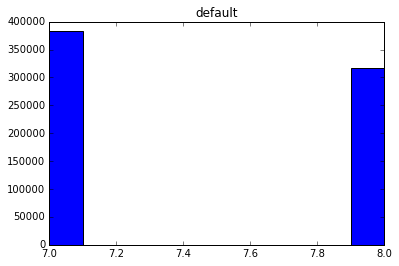

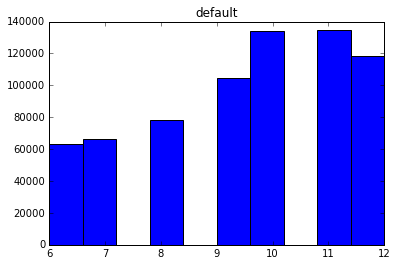

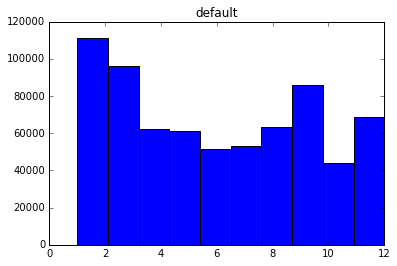

In [46]:
print_hist(server_data[server_data['target'] == 1]['month'])
print_hist(server_data[server_data['target'] == 2]['month'])
print_hist(server_data[server_data['target'] == 3]['month'])

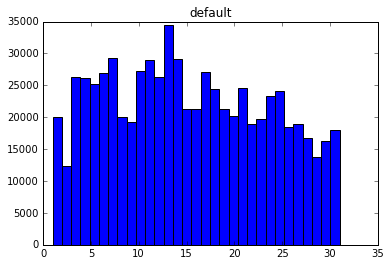

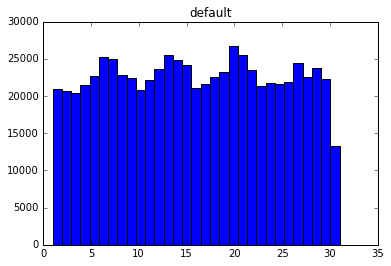

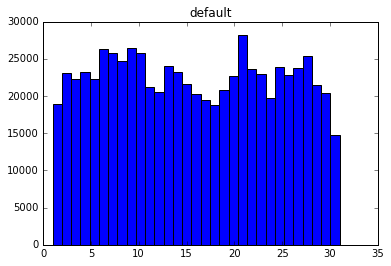

In [49]:
print_hist(server_data[server_data['target'] == 1]['day'], b=31)
print_hist(server_data[server_data['target'] == 2]['day'], b=31)
print_hist(server_data[server_data['target'] == 3]['day'], b=31)

In [89]:
KNN = KNeighborsClassifier(1)

server_stand = hstack((preprocessing.scale(server_data[['day', 'dayofweek', 'hour', 'size']], axis=0),  server_data['target'].get_values().reshape(-1, 1)))
server_stand_perm = random.permutation(server_stand)

print server_stand.max(axis=0)
print server_stand.min(axis=0)

KNN.fit(server_stand_perm[:1000000, :4], server_stand_perm[:1000000, 4])
(KNN.predict(server_stand_perm[1000000:, :4]) == server_stand_perm[1000000:, 4]).mean()

Shape: (5,)
[   1.7720032     1.68130638    1.8185499   367.61719204    3.        ]
Shape: (5,)
[-1.68359005 -1.6684451  -2.33480303 -0.14817651  1.        ]


0.76818717816801052

In [90]:
server_norm = hstack((preprocessing.normalize(server_data[['day', 'dayofweek', 'hour', 'size']], axis=0),  server_data['target'].get_values().reshape(-1, 1)))
server_norm_perm = random.permutation(server_norm)

print server_norm.max(axis=0)
print server_norm.min(axis=0)

KNN.fit(server_norm_perm[:1000000, :4], server_norm_perm[:1000000, 4])
(KNN.predict(server_norm_perm[1000000:, :4]) == server_norm_perm[1000000:, 4]).mean()

Shape: (5,)
[  1.19779305e-03   1.18885739e-03   1.12888859e-03   2.51148572e-01
   3.00000000e+00]
Shape: (5,)
[  3.86384854e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00]


0.77324361116549278

In [91]:
server= server_data[['day', 'dayofweek', 'hour', 'size', 'target']]
server_perm = random.permutation(server)

print server.max(axis=0)
print server.min(axis=0)

KNN.fit(server_perm[:1000000, :4], server_perm[:1000000, 4])
(KNN.predict(server_perm[1000000:, :4]) == server_perm[1000000:, 4]).mean()

day                31.0
dayofweek           6.0
hour            86399.0
size         30193824.0
target              3.0
dtype: float64
day          1.0
dayofweek    0.0
hour         0.0
size         0.0
target       1.0
dtype: float64


0.70544570458156719

In [92]:
server_pca = decomposition.PCA(whiten=True).fit_transform(server_perm[:, :4])

print server_pca.max(axis=0)
print server_pca.min(axis=0)

KNN.fit(server_pca[:1000000, :4], server_perm[:1000000, 4])
(KNN.predict(server_pca[1000000:, :4]) == server_perm[1000000:, 4]).mean()

Shape: (4,)
[ 367.6164154     2.3356157     4.34407289    1.76386526]
Shape: (4,)
[-0.14880526 -2.3086003  -1.68804809 -1.75636218]


0.76749787152671856

In [133]:
server = server_data[['day', 'dayofweek', 'hour', 'method', 'protocol', 'code', 'size', 'target']]
server_perm = random.permutation(server)

X = server_perm[:,:7]
y = server_perm[:,7]

km = KMeans(n_clusters=3).fit(X)

In [134]:
from collections import Counter
print km.labels_
print Counter(km.labels_)
#km.predict(Xtest[1001000:1002000])

Shape: (2098205,)
[0 0 0 ..., 0 0 0]
Counter({0: 2093452, 1: 4711, 2: 42})


In [189]:
tld = re.compile('.+\.(.+)$')
ip = re.compile('^(\d{1,3})\.\d{1,3}\.\d{1,3}\.\d{1,3}')
d = server_data[server_data['target'] == 1]['domain']
dd = []
for l in d:
    if ip.match(l) != None:
        dd.append("ip:" + ip.match(l).group(1))
    elif tld.match(l) != None:
        dd.append("tld:" + tld.match(l).group(1))
    else:
        dd.append("intranet")

cat = pd.Categorical.from_array(dd)
for c in cat.categories:
    print c


intranet
ip:128
ip:129
ip:13
ip:130
ip:131
ip:132
ip:133
ip:134
ip:135
ip:136
ip:137
ip:138
ip:139
ip:140
ip:141
ip:142
ip:143
ip:144
ip:145
ip:146
ip:147
ip:148
ip:149
ip:15
ip:150
ip:151
ip:152
ip:153
ip:154
ip:155
ip:156
ip:157
ip:158
ip:159
ip:160
ip:161
ip:162
ip:163
ip:164
ip:165
ip:166
ip:167
ip:168
ip:169
ip:17
ip:170
ip:171
ip:18
ip:192
ip:193
ip:194
ip:196
ip:198
ip:199
ip:20
ip:200
ip:202
ip:203
ip:204
ip:205
ip:206
ip:33
ip:35
ip:36
ip:38
ip:40
ip:44
ip:45
ip:57
ip:6
tld:ar
tld:arpa
tld:at
tld:au
tld:be
tld:bm
tld:br
tld:ca
tld:ch
tld:cl
tld:cn
tld:co
tld:com
tld:cr
tld:cy
tld:cz
tld:de
tld:dk
tld:do
tld:ec
tld:edu
tld:ee
tld:eecs
tld:eg
tld:es
tld:fi
tld:fj
tld:fr
tld:gb
tld:ge
tld:gl
tld:go
tld:gov
tld:gr
tld:hk
tld:hps
tld:hr
tld:hu
tld:id
tld:ie
tld:il
tld:in
tld:int
tld:is
tld:it
tld:jm
tld:jp
tld:kr
tld:kw
tld:li
tld:line4
tld:line5
tld:lu
tld:lv
tld:microd
tld:mil
tld:mt
tld:mx
tld:my
tld:net
tld:nl
tld:no
tld:nz
tld:org
tld:pa
tld:pe
tld:ph
tld:pl
tld:pr
tld:pt
tld:

In [136]:
print pd.Categorical.from_array(server_data['content'])

[/~macphed/finite/fe_resources/node16.html, /dcs/courses/cai/html/introduction_lesson/desc..., /mlookup/white.html, /~scottp/publish.html, /~scottp/index.html, ..., 10887.GIF, index.html, 492.html, index.html, index.html]
Length: 2098205
Categories (40013, object): [, /, /, / -  the university of saskatchewan homepage, ..., index.html ~kinawi, index.html ~mildred/451, index.html ���g�� '܃؃Q���N�@���@�n@�N@��@�..., �|t�9ð'À|u&�G]
